##### Copyright 2019 The TensorFlow Authors.

In [103]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [104]:
print("Shape of training images:", train_images.shape)  # (60000, 28, 28)
print("Shape of training labels:", train_labels.shape)  # (60000,)
print("Shape of test images:", test_images.shape)       # (10000, 28, 28)
print("Shape of test labels:", test_labels.shape)       # (10000,)

Shape of training images: (60000, 28, 28)
Shape of training labels: (60000,)
Shape of test images: (10000, 28, 28)
Shape of test labels: (10000,)


In [105]:
train_images.shape

(60000, 28, 28)

In [106]:
len(train_labels)

60000

In [107]:
train_labels


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [108]:
test_images.shape

(10000, 28, 28)

In [109]:
len(test_labels)

10000

In [110]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [111]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [112]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [113]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [114]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8734 - loss: 0.4464
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9665 - loss: 0.1193
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9779 - loss: 0.0761
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9841 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9887 - loss: 0.0380


In [115]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([3.0588232e-08, 9.9940045e-10, 3.2970550e-07, 1.4570858e-05,
       9.9773155e-11, 3.1667848e-09, 2.3898808e-13, 9.9998468e-01,
       4.8081858e-08, 3.6428517e-07], dtype=float32)

In [116]:
predictions[0].argmax()


7

In [117]:
predictions[0][7]


0.9999847

In [118]:
test_labels[0]


7

In [119]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9783 - loss: 0.0758
test_acc: 0.98089998960495


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


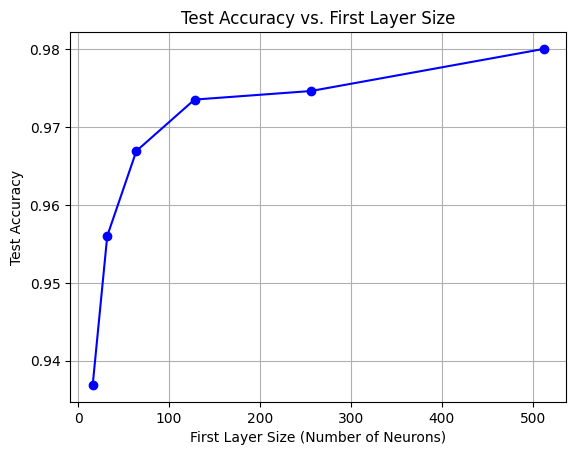

In [121]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

# List of different first layer sizes
layer_sizes = [16, 32, 64, 128, 256, 512]
test_accuracies = []

# Loop through each layer size
for size in layer_sizes:
    # Define the model with the current layer size
    model = Sequential([
        layers.Dense(size, activation="relu", input_shape=(28*28,)),  # First layer size
        layers.Dense(10, activation="softmax")  # Output layer
    ])

    # Compile the model
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)  # Set verbose=0 to suppress output

    # Evaluate the model on test data
    _, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    # Append the test accuracy for this model configuration
    test_accuracies.append(test_acc)

# Plot the results
plt.plot(layer_sizes, test_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('First Layer Size (Number of Neurons)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. First Layer Size')
plt.grid(True)
plt.show()

[0.9801999926567078, 0.9829000234603882, 0.9818999767303467, 0.98089998960495, 0.979200005531311]


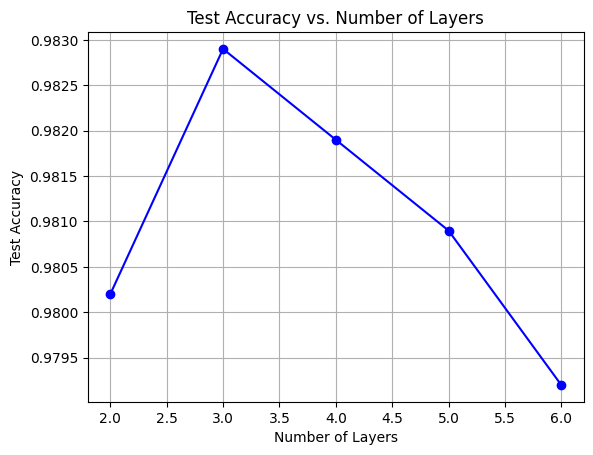

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Load the MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the images
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255


layer_sizes=[
    [512, 10],            # Case 1: 2 layers (1 hidden + 1 output)
    [512, 256, 10],       # Case 2: 3 layers (2 hidden + 1 output)
    [512, 256, 128, 10],  # Case 3: 4 layers (3 hidden + 1 output)
    [512, 256, 128, 64, 10],  # Case 4: 5 layers (4 hidden + 1 output)
    [512, 256, 128, 64, 32, 10]  # Case 5: 6 layers (5 hidden + 1 output)
]
test_accuracies = []



for num_layers in layer_sizes:
  model = Sequential()

  model.add(layers.Dense(512, activation="relu", input_shape=(28 * 28,)))
    # Add additional hidden layers
  for size in num_layers[1:-1]:
    model.add(layers.Dense(size, activation="relu"))
  model.add(layers.Dense(num_layers[-1], activation="softmax"))

  model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  model.fit(train_images, train_labels, epochs=5, batch_size=128, verbose=0)  # Set verbose=0 to suppress output

    # Evaluate the model on test data
  _, test_acc = model.evaluate(test_images, test_labels, verbose=0)

    # Append the test accuracy
  test_accuracies.append(test_acc)

# Plot the results
print(test_accuracies)
number_of_layers=[len(case) for case in layer_sizes]
plt.plot(number_of_layers, test_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Layers')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Number of Layers')
plt.grid(True)
plt.show()


